# Introduction To Neural Network Classification With TensorFlow:

In this notebook, we're going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary Classification
* Multiclass Classification
* Multilabel Classification

## Creating Data To View And Fit:

In [1]:
from sklearn.datasets import make_circles #A simple toy dataset to visualize clustering and classification algorithms
# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise = 0.03, random_state = 42) #Make a large circle containing a smaller circle in 2D

In [2]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now... let's visualize it!

In [2]:
import pandas as pd
circles = pd.DataFrame({'X0': X[:, 0], 'X1': X[:, 1], 'label': y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


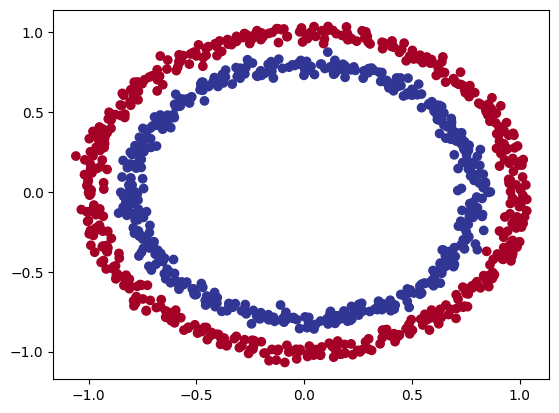

In [3]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdYlBu);

🛠️ **Exercise:** Before pushing forward, spend 10-minutes playing around with [playground.tensorflow.org](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.91930&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) building and running different neural networks. See what happens when you change different hyperparameters.

## Input And Output Shapes:

In [6]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we're working with
len(X), len(y)

(1000, 1000)

In [8]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), np.int64(1))

## Steps In Modeling:

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [4]:
# Import TensorFlow
import tensorflow as tf
tf.__version__

'2.19.0'

In [10]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(), #The Binary Cross Entropy loss function is typically used with binary classification problems, like this one.
                optimizer = tf.keras.optimizers.SGD(), #It generally doesn't matter what optimizer is used for binary classification problems,
                metrics = ['accuracy']) #While there's a plethora of classification metrics, accuracy is the most common one used in ML

# 3. Fit the model
model_1.fit(X, y, epochs = 5)
#With an accuracy near 50%, the current model is basically guessing which class each point belongs to.

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4433 - loss: 3.6332
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5201 - loss: 0.7231
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5281 - loss: 0.6978
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5221 - loss: 0.6930
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5171 - loss: 0.6926


In [11]:
# Let's try and improve out model by training for longer...
model_1.fit(X, y, epochs = 200, verbose = 0)
model_1.evaluate(X, y) #This is a cardinal sin, as we're fitting on training data, but this is just for demonstration
#The model's still guessing...

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4852 - loss: 0.6927  


[0.6932879686355591, 0.4729999899864197]

Since we're working on a binary classification problem and our model is getting ~50% accuracy... it's performing as if it's guessing.

So let's step things up a notch and add an extra layer.

In [12]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['accuracy'])

# 3. Fit the model
model_2.fit(X, y, epochs = 100, verbose = 0)

In [13]:
# 4. Evaluate the model
model_2.evaluate(X, y) #It's still guessing!

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4955 - loss: 0.6931


[0.693274736404419, 0.5]

In [14]:
circles['label'].value_counts() #If we alternated red and blue, we'd get around the same results as our current model. What a shame!

label
1    500
0    500
Name: count, dtype: int64

## Improving Our Model:

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - We might want to add more layers or increase the number of hidden units within a layer.
2. Compiling a model - Here we might want to choose a different optimization function such as Adam instead of SGD.
3. Fitting a model - Perhaps we might fit our model for more epochs (leave it training for longer).

In [15]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 dense neurons
    tf.keras.layers.Dense(10), # add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs = 100, verbose = 0)

In [16]:
# 4. Evaluate the model
model_3.evaluate(X, y) #We're still getting a guessing model!
#But what if there's other modifiers we haven't gone over that could help?
#We'll see those after investigating why each model so far is a guessing model.

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5057 - loss: 0.6916


[0.6960400342941284, 0.49000000953674316]

In [17]:
model_3.predict(X) #All the predictions are sitting around 0.5, but we want them closer to 0 and 1

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


array([[0.528808  ],
       [0.45610607],
       [0.45394844],
       [0.48919344],
       [0.48039156],
       [0.48469767],
       [0.5102147 ],
       [0.52709806],
       [0.45500857],
       [0.51174355],
       [0.4404576 ],
       [0.5386194 ],
       [0.50620896],
       [0.5109122 ],
       [0.49706626],
       [0.47265828],
       [0.43276837],
       [0.46789312],
       [0.44552845],
       [0.4344312 ],
       [0.52943695],
       [0.48617357],
       [0.45581377],
       [0.5295419 ],
       [0.4581139 ],
       [0.44906998],
       [0.529498  ],
       [0.5206049 ],
       [0.47537524],
       [0.5034034 ],
       [0.44490883],
       [0.5061127 ],
       [0.51065075],
       [0.53391325],
       [0.45048767],
       [0.47063258],
       [0.47739536],
       [0.5290135 ],
       [0.47663057],
       [0.5406812 ],
       [0.43566692],
       [0.5317324 ],
       [0.43305767],
       [0.5183248 ],
       [0.43041274],
       [0.4337774 ],
       [0.48773348],
       [0.520

🔑 **Note:** Whenever your model is performing strangely or there's something going on with your data you're not quite sure of, remember these three words: **visualize, visualize, visualize**. Inspect your data, inspect your model, inspect your model's predictions.

To visualize our model's predictions, let's creat a function 'plot_decision_boundary()'; this function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [5]:
import numpy as np

def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    This function was inspired by two resources:
    1. https://cs231n.github.io/neural-networks-case-study/
    2. Source redacted
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1 #The + and - 0.1 is to give a small margin
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Create X value (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        print('Doing multiclass classification')
        # We have to reshape our prediction to ge tthem ready for plotting
        y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)
    else:
        print('Doing binary classification')
        y_pred = np.round(y_pred).reshape(xx.shape)
    
    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
    plt.scatter(X[:, 0], X[:, 1], c = y, s = 40, cmap = plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Doing binary classification


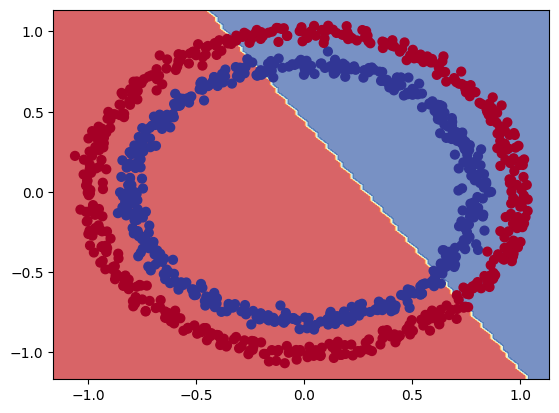

In [19]:
# Check out the predictions our model is making
plot_decision_boundary(model = model_3, X = X, y = y)
#As revealed by the function, the reason the models are all performing poorly is that they're all simply drawing a straight line through the data when the data isn't separable by a straight line.

In [20]:
# Let's see if our model can be used for a regression problem...

tf.random.set_seed(42)
# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression [150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
model_3.fit(X_reg_train, y_reg_train, epochs = 100)

Epoch 1/100


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_2_1/Cast:0", shape=(None,), dtype=float32). Expected shape (None, 2), but input has incompatible shape (None,)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None,), dtype=int32)
  • training=True
  • mask=None

Oh wait... we compiled our model for a binary classification problem.

But... we're now working on a regression problem; let's change the model to suit our data.

In [21]:
# Setup random seed
tf.random.set_seed(42)

# 1. Creat ethe model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model, this time with a regression-specific loss function
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae'])

# 3. Fit the model
model_3.fit(X_reg_train, y_reg_train, epochs = 100)
#If you're using TensorFlow 2.7.0+ (default in Google Colab from November 2021), you might run into some shape errors when trying to fit a model (calling model.fit()).
#This happened due to some changes in TensorFlow 2.7.0.
#In short, TensorFlow no longer automatically upranks single dimension data from (batch_size, ) to (batch_size, 1).
#This is fine because it can be fixed with a couple of lines of code.

Epoch 1/100


ValueError: Input 0 of layer "dense_6" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)

This is a shape error, one of the most common in deep learning and you should expect to get more of them.

In [22]:
# Setup random seed
tf.random.set_seed(42)

# 1. Creat ethe model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), #Define input_shape here
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model, this time with a regression-specific loss function
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae'])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis = -1), y_reg_train, epochs = 100) #Expand input dimensions

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 517.1470 - mae: 517.1470
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 409.8769 - mae: 409.8769 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 301.6409 - mae: 301.6409
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 190.1412 - mae: 190.1412
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 77.0009 - mae: 77.0009
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 65.1778 - mae: 65.1778
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 85.2122 - mae: 85.2122
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 61.8376 - mae: 61.8376
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 42.5084 - mae: 42.5084
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 48.3777 - mae: 48.3777
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 40.4788 - mae: 40.4788
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 42.9555 - mae: 42.9555
Epoch 13/100
5/5

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


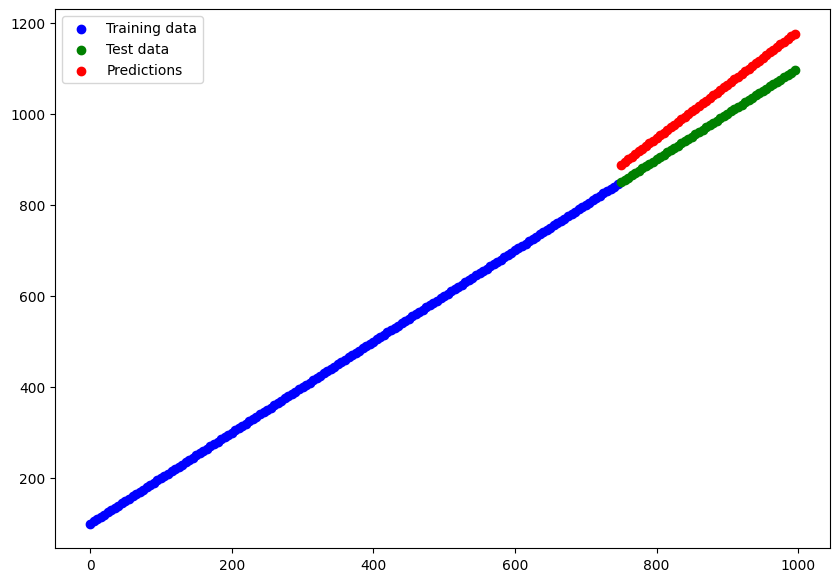

In [23]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize = (10, 7))
plt.scatter(X_reg_train, y_reg_train, c = 'b', label = 'Training data')
plt.scatter(X_reg_test, y_reg_test, c = 'g', label = 'Test data')
plt.scatter(X_reg_test, y_reg_preds, c = 'r', label = 'Predictions')
plt.legend();

#This experiment means that the model is learning something, but it's still missing something for our classification problem.
#That's because this data is linear, but the classification data is nonlinear

## The Missing Piece - Non-Linearity:

In [24]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = tf.keras.activations.linear) #New hyperparameter: The activation function determines the output of a neuron (node) based on its input
]) #Linear is the default activation function in Tensorflow

# 2. Compile the model
model_4.compile(loss = 'binary_crossentropy', #Most hyperparameter options can be shortcutted by typing them as strings
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), #However, if you plan to adjust a parameter of the hyperparameter, you should type the whole thing out
                metrics = ['accuracy'])

# 3. Fit the model
history = model_4.fit(X, y, epochs = 100) #Remember that we passed a dataframe into this model, so it doesn't need reshaping.
#Starting now, it's a good idea to save your model's training history to a variable

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4830 - loss: 4.5472
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4830 - loss: 4.2144
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4830 - loss: 3.9102
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4830 - loss: 3.4012
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4830 - loss: 3.2815
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4830 - loss: 3.2712
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4830 - loss: 3.2258
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4830 - loss: 3.2138
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4830 - loss: 3.1945
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4830 - loss: 3.1438
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4830 - loss: 3.0604
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy

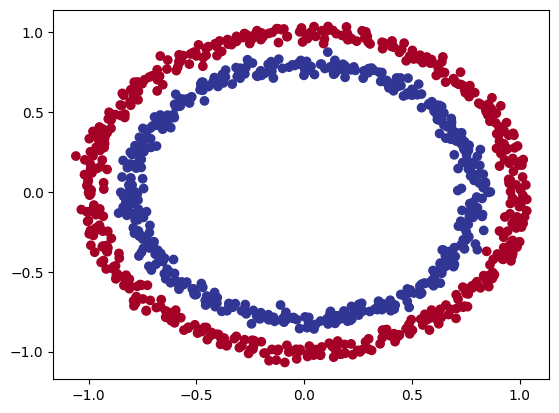

In [25]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdYlBu)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Doing binary classification


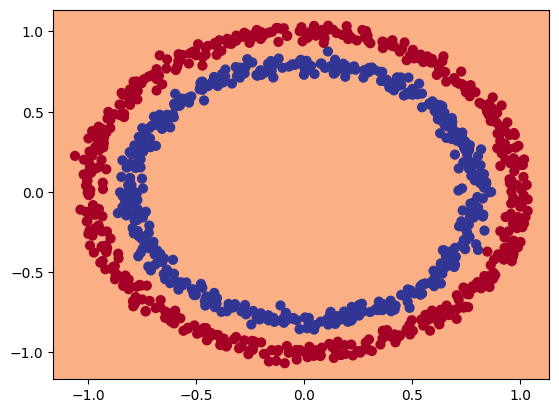

In [26]:
# Check the decision boundary for our latest model
plot_decision_boundary(model = model_4, X = X, y = y) #Anything in the yellow zone is basically the model saying that it could be either blue or red, but it doesn't know for sure.

Let's try to build our first neural network with a non-linear activation function.

In [27]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = tf.keras.activations.relu)
])

# 2. Compile the model
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), #In case you're wondering, they removed the alias 'lr' for quickly calling the learning_rate parameter. :(
                metrics = ['accuracy'])

# 3. Fit the model
history = model_5.fit(X, y, epochs = 100)
#Somehow, the model is now even worse than guessing. Now, we've only tried changing the activation functions alone, but what if we combine it with other model improvement means?

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4141 - loss: 4.5746
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4395 - loss: 4.5169
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4542 - loss: 4.2879
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4626 - loss: 4.1684
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4691 - loss: 4.0320
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4726 - loss: 3.9767
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4785 - loss: 3.8123
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4876 - loss: 3.7746
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4857 - loss: 3.7200
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4884 - loss: 3.6759
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4937 - loss: 3.6406
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accurac

In [28]:
# Time to create a multi-layer nueral network that was practiced on the TensorFlow playground in code...

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1) #The Tensorflow playground doesn't show the output layer, which you must still explicitly define in code
])

# 2. Compile the model
model_6.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ['accuracy'])

# 3. Fit the model
history = model_6.fit(X, y, epochs = 250)

Epoch 1/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4826 - loss: 4.9277
Epoch 2/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4460 - loss: 2.5180
Epoch 3/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4252 - loss: 1.0893
Epoch 4/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.4315 - loss: 1.0612
Epoch 5/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4316 - loss: 1.0591
Epoch 6/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4321 - loss: 1.0579
Epoch 7/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4322 - loss: 1.0565
Epoch 8/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4322 - loss: 1.0551
Epoch 9/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4338 - loss: 1.0535
Epoch 10/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4347 - loss: 1.0519
Epoch 11/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4354 - loss: 1.0502
Epoch 12/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accurac

In [ ]:
# Evaluate the model
model_6.evaluate(X, y) #It continues to guess away, but you may be able to tell why now

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4958 - loss: 0.6963 


[0.6933397650718689, 0.49799999594688416]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Doing binary classification


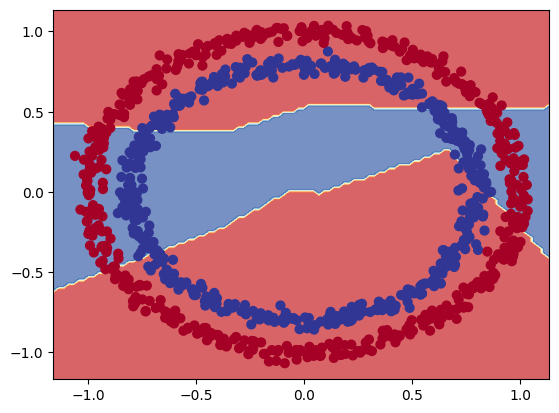

In [ ]:
# How do our model predictions look?
plot_decision_boundary(model_6, X, y) #It's starting to display a more complex decision boundary, but it's still doing it with segments of straight lines

You probably guessed it; The other missing piece is changing the output layer activation because previously, while all the other layers were non-linear, the last layer was left linear by default!

In [34]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid') #The sigmoid activation model is used on the output layer of a binary classification model
])

# 2. Compile the model
model_7.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ['accuracy'])

# 3. Fit the model
history = model_7.fit(X, y, epochs = 250)

Epoch 1/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5195 - loss: 0.7094
Epoch 2/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5221 - loss: 0.7040
Epoch 3/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5231 - loss: 0.7010
Epoch 4/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5177 - loss: 0.6992
Epoch 5/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5090 - loss: 0.6981
Epoch 6/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5045 - loss: 0.6972
Epoch 7/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5048 - loss: 0.6966
Epoch 8/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4879 - loss: 0.6961
Epoch 9/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4673 - loss: 0.6957
Epoch 10/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4593 - loss: 0.6953
Epoch 11/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4769 - loss: 0.6950
Epoch 12/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - 

In [35]:
# 4. Evaluate our model
model_7.evaluate(X, y) #Lucky model number 7 finally doesn't guess!

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9946 - loss: 0.0874


[0.08609694987535477, 0.9940000176429749]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Doing binary classification


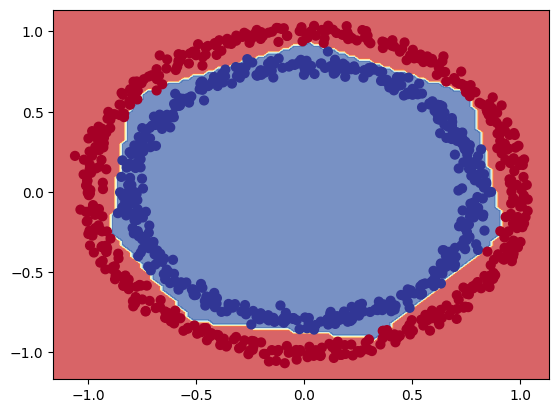

In [36]:
# Let's visualize our incredible metrics
plot_decision_boundary(model_7, X, y)

🤔 **Question:** What's wrong with the predictions we've made? Are we really evaluating our model correctly Hint: What data did the model learn on and what data did we predict on?

🔑 **Note:** The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

Now we've discussed the concept of linear and non-linear functions (or lines), let's see them in action.

In [37]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

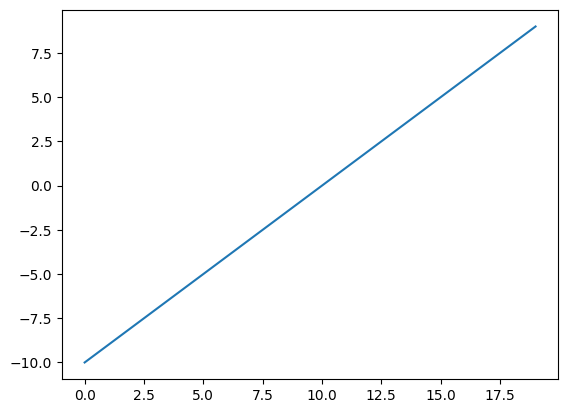

In [38]:
# Visualize our toy tensor
plt.plot(A);

In [39]:
# Let's start by replicating sigmoid; sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

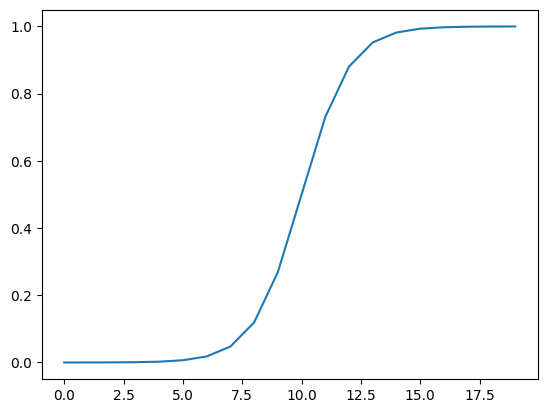

In [ ]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A)); #It looks like the logistic function because it is it!

In [41]:
# Let's recreate the relu function, which is 0 for input values less than 0, but equal to the input for anything at least 0
# In other words, relu(x) = max(x, 0)
def relu(x):
    return tf.maximum(0, x)

# Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

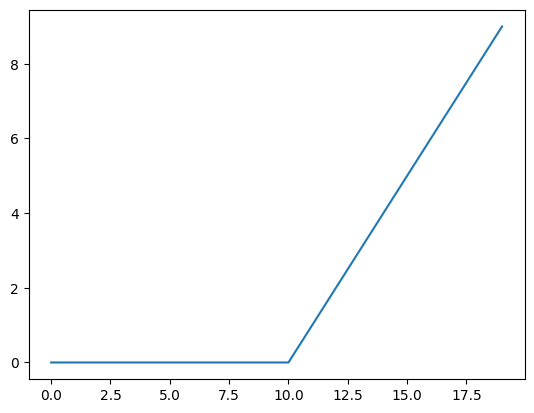

In [42]:
# Plot ReLU-modified tensor
plt.plot(relu(A));

In [43]:
# Let's try the linear activation function
tf.keras.activations.linear(A) #It just returns the original tensor lol!

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

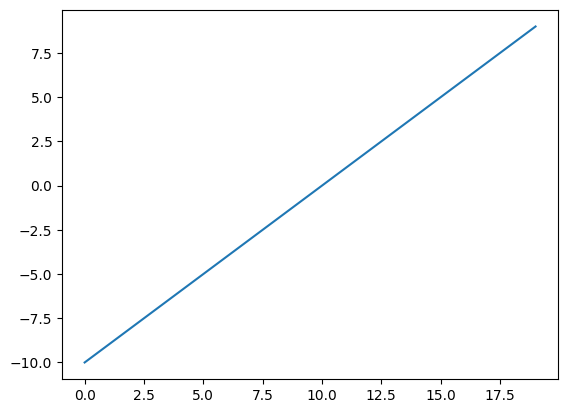

In [44]:
# Does the linear activation function change anything?
plt.plot(tf.keras.activations.linear(A));

In [ ]:
# Does A even change?
A == tf.keras.activations.linear(A) #No it doesn't! And that's why the models never learned anything before introducing the activation function hyperparameter.

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating And Improving Our Classification Model:

So far we've been training and testing on the same dataset...

However, in machine learning this is basically a sin.

So let's create a training and test set.

In [47]:
# Check how many examples we have
len(X)

1000

In [7]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [49]:
model_7.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113 (456.00 B)

 Trainable params: 37 (148.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 76 (308.00 B)

In [20]:
# Let's recreate a model to fit on the training data and evaluate on the testing data

# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_7)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# 2. Compile the model
model_8.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01), #Just as an experiment, let's see if the model can discover the patterns faster by changing the learning rate
                metrics = ['accuracy'])

# 3. Fit the model
history = model_8.fit(X_train, y_train, epochs = 50)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4829 - loss: 0.7065
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5023 - loss: 0.6961
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5118 - loss: 0.6920
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5292 - loss: 0.6879
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5311 - loss: 0.6829
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5269 - loss: 0.6759
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5649 - loss: 0.6670
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6000 - loss: 0.6572
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6086 - loss: 0.6421
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7158 - loss: 0.6076
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7809 - loss: 0.5474
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8123

In [7]:
# 4. Evaluate the model on the test dataset
model_8.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9760 - loss: 0.0805 


[0.08145172894001007, 0.9750000238418579]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Doing binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Doing binary classification


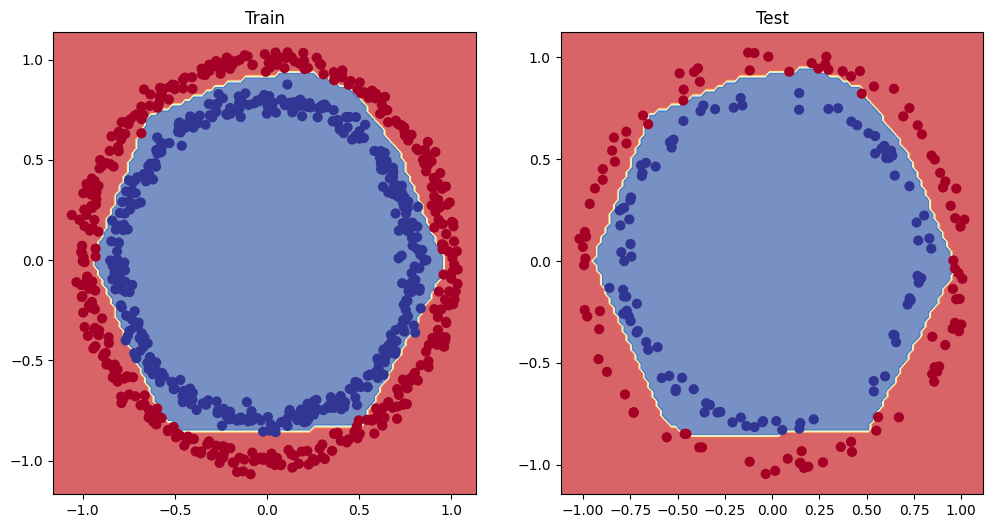

In [10]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_8, X = X_train, y = y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_8, X = X_test, y = y_test)
plt.show()

## Plot The Loss (or training) Curves:

In [11]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history) #BEWARE: Saving training history often KILLS your Python kernel!

,accuracy,loss
0,0.48875,0.697710
1,0.55250,0.687429
2,0.63250,0.679561
3,0.61250,0.670451
4,0.62250,0.659908
5,0.62750,0.648584
6,0.67250,0.637406
7,0.70000,0.625456
8,0.70500,0.612511
9,0.70125,0.598475


Text(0.5, 1.0, 'Model_8 Loss Curves:')

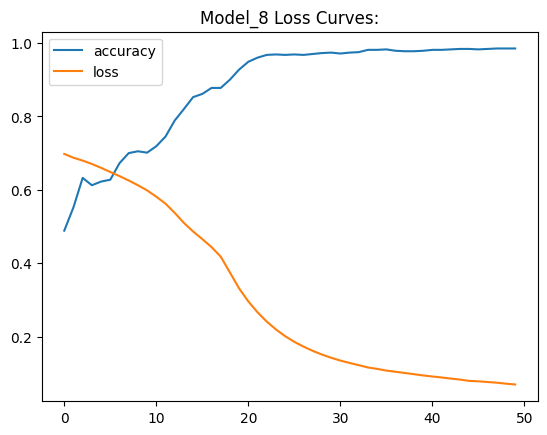

In [14]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title('Model_8 Loss Curves:')

🔑 **Note:** For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

## Finding The Best Learning Rate:

To find the ideal learning rate (the learning rate where the loss decreases the most during training), we're going to use the following steps:
* A learning rate **callback** - You can think of a callback as an extra piece of functionality, you can add to your model *while* it's training.
* Another model (we could use the same one as above, but we're practicing building models here).
* A modified loss curve plot.

In [8]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile the model
model_9.compile(loss = 'binary_crossentropy',
                optimizer = 'Adam',
                metrics = ['accuracy'])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) #At the beginning of every epoch, this callback gets the updated learning rate value from "schedule" function provided an "__init__", with the current epoch and current learning rate, and applies the updated learning rate on the optimizer.

# Fit the model (passing lr_scheduler callback)
history_9 = model_9.fit(X_train, y_train, epochs = 100, callbacks = [lr_scheduler]) #Callbacks are passed in as a list in case you have more than one callback applied
#Using callbacks can lead to stack overflows, which kill kernels!

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5091 - loss: 0.7117 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5062 - loss: 0.7111 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5050 - loss: 0.7104 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5005 - loss: 0.7097 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5019 - loss: 0.7090 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5026 - loss: 0.7082 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5006 - loss: 0.7074 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5001 - loss: 0.7066 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4985 - loss: 0.7058 - learning_

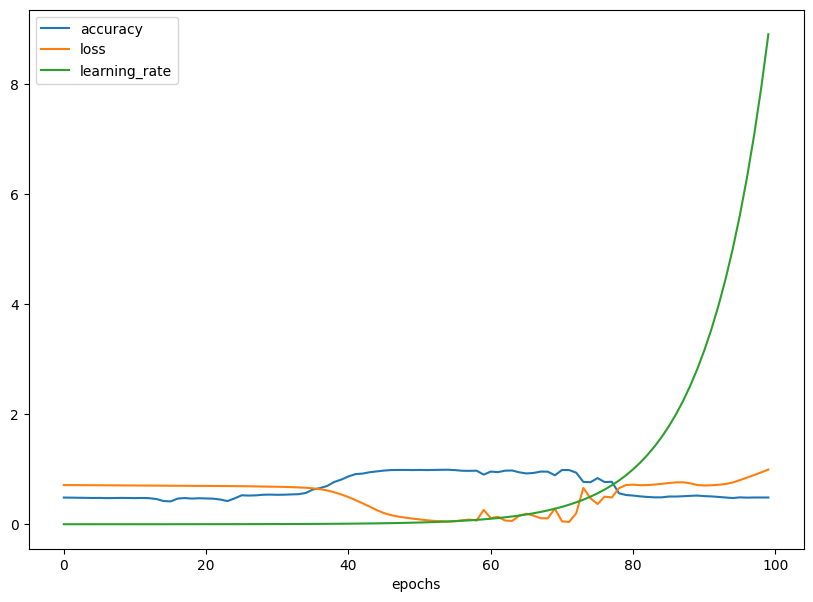

In [9]:
# Check out the history
pd.DataFrame(history_9.history).plot(figsize = (10, 7), xlabel = 'epochs');

Text(0.5, 1.0, 'Learning Rate Vs Loss')

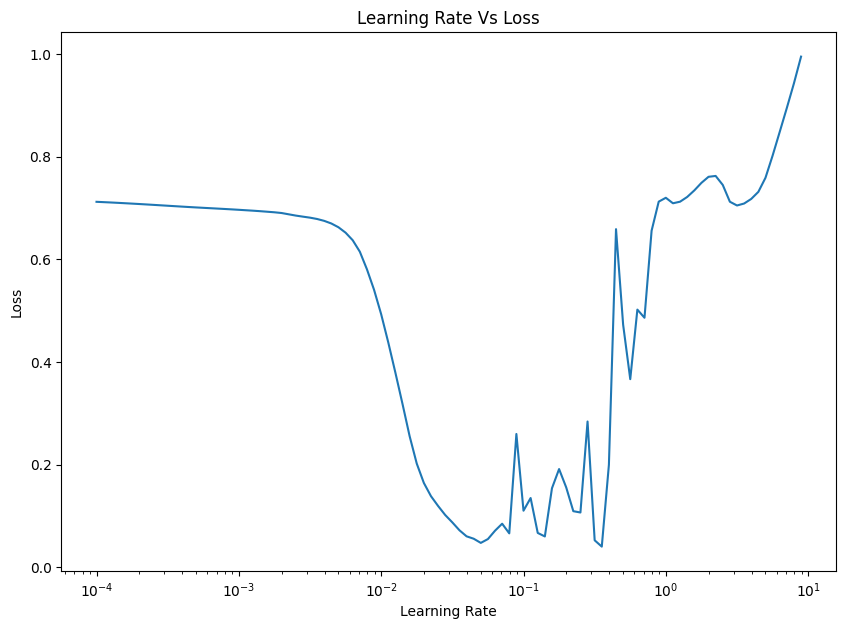

In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize = (10, 7))
plt.semilogx(lrs, history_9.history['loss']) #Semilogx makes a plot with log scaling on the x axis
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning Rate Vs Loss')
#The ideal learning rate is somewhere where the loss in still decreasing before the loss curve flattens out, typically around 10 times smaller than where that happens

In [12]:
# Example of other typical learning rate values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [13]:
# Learning rate we used before (model_8)
10**-2

0.01

In [8]:
# Let's try using a higher *ideal* learning rate with the same model as before

# Set random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile the model with the ideal learning rate
model_10.compile(loss = 'binary_crossentropy',
                 optimizer = tf.keras.optimizers.Adam(learning_rate = 0.02),
                 metrics = ['accuracy'])

# Fit the model for 50 epochs (half as many as before)
history_10 = model_10.fit(X_train, y_train, epochs = 50)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4597 - loss: 0.7188
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5170 - loss: 0.6887 
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5402 - loss: 0.6824 
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5796 - loss: 0.6682
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5921 - loss: 0.6499
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6286 - loss: 0.6317
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6622 - loss: 0.6056
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7003 - loss: 0.5763
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7347 - loss: 0.5484
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7431 - loss: 0.5261
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7448 - loss: 0.5117
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7626 -

In [18]:
# Evaluate model 10 on the test dataset
model_10.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.9892 - loss: 0.0297


[0.020392732694745064, 0.9950000047683716]

In [21]:
# Evaluate model 8 on the test data
model_8.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9828 - loss: 0.0843  


[0.08126305788755417, 0.9800000190734863]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step
Doing binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Doing binary classification


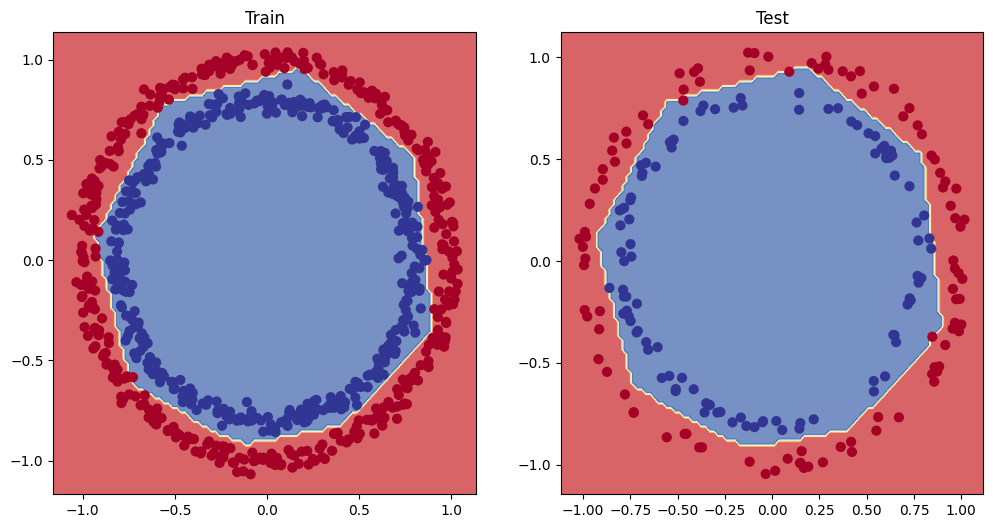

In [9]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_10, X = X_train, y = y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_10, X = X_test, y = y_test)
plt.show()

## More Classification Evaluation Methods:

Alongside visualizing our model's results as much as possible, there are a handful of other classifcication evaluation methods & metrics you should be familiar with (in which you probably already are from the sklearn machine learning course):
* Accuracy
* Precision
* Recall
* F1-Score
* Confusion Matrix
* Classification Report (from scikit-learn) - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [10]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f'Model lost on the test set: {loss}')
print(f'Model accuracy on the test set: {(accuracy * 100):.2f}%')

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9854 - loss: 0.0275
Model lost on the test set: 0.02941611036658287
Model accuracy on the test set: 98.50%


How about a confusion matrix?

In [ ]:
# Create a confusion matriz
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds) #Something's different between the test and predicted labels

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step 


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
y_test[:10] #The test array is in binary form

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
y_preds[:10] #But the prediction array is in continuous form

array([[0.9998831 ],
       [0.99979144],
       [0.99882865],
       [0.9986998 ],
       [0.00499517],
       [0.01124525],
       [0.99009544],
       [0.0010635 ],
       [0.98861754],
       [0.00548891]], dtype=float32)

Oops... looks like our predictions array has come out in **prediction probability** from... the standard output from the sigmoid (or softmax) activation functions.

In [14]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [15]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[98,  3],
       [ 0, 99]])

How about we prettify our confusion matrix?

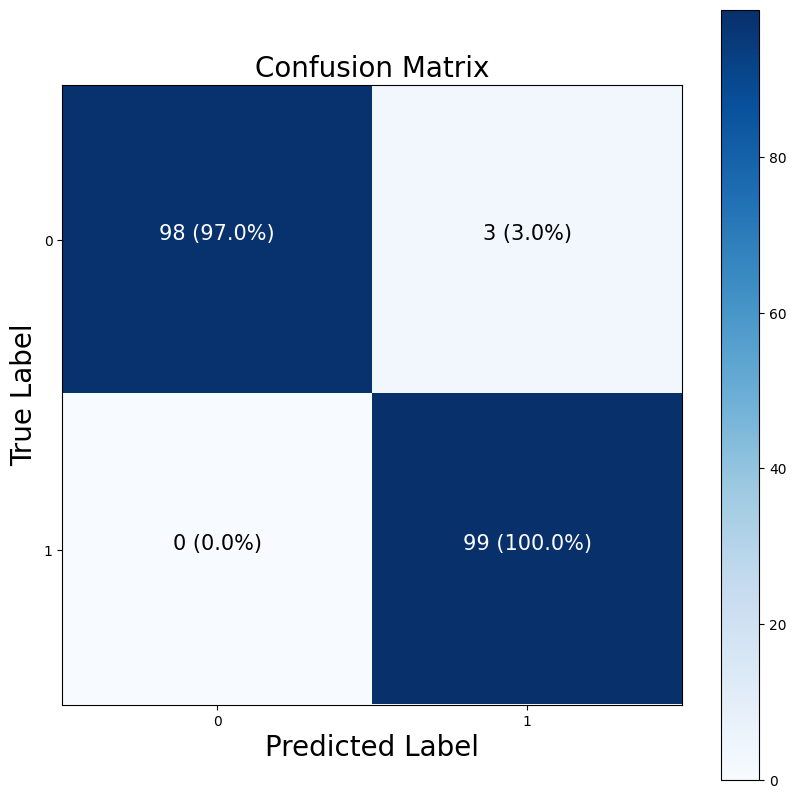

In [21]:
# NoteL the confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix (now ConfusionMatrixDisplay)
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
# You'll often run into situations where you want some type of functionality that exists somewhere else, but to get it to work for your use-case, you'll have to tailor it to that.

import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype('float') / cm.sum(axis = 1)[: np.newaxis] # Normalize our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize = figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap = plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title = 'Confusion Matrix',
       xlabel = 'Predicted Label',
       ylabel = 'True Label',
       xticks = np.arange(n_classes),
       yticks = np.arange(n_classes),
       xticklabels = labels,
       yticklabels = labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f'{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)', horizontalalignment = 'center', color = 'white' if cm[i, j] > threshold else 'black', size = 15)

# Working With A Larger Example (Multiclass Classification):

When you have more than two classes as an option, it's known as **multi-class classification**.
* This mean if you have 3 different classes, it's multi-class classification.
* It also mean if you have 100 different classes, it's multi-class classification.

To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist #https://www.tensorflow.org/datasets/catalog/fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [ ]:
# Show the first training example
print(f'Training sample:\n{train_data[0]}\n')
print(f'Training label:\n{train_labels[0]}\n')
#According to the dataset's info, this first sample is of an ankle boot

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [24]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

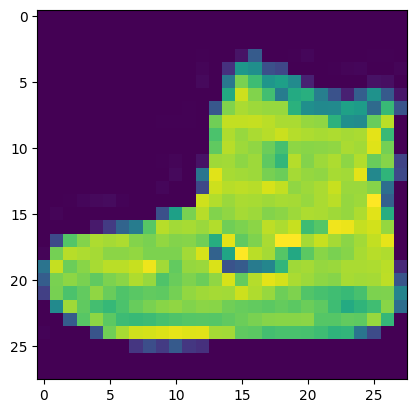

In [2]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);

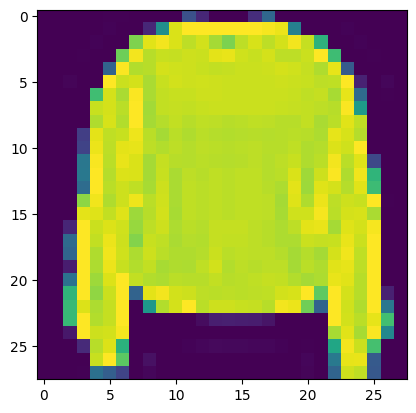

In [26]:
# Plot another sample
plt.imshow(train_data[7]);

In [27]:
# Check out sample's label
train_labels[7] #This is a pullover according to the reference

np.uint8(2)

In [16]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

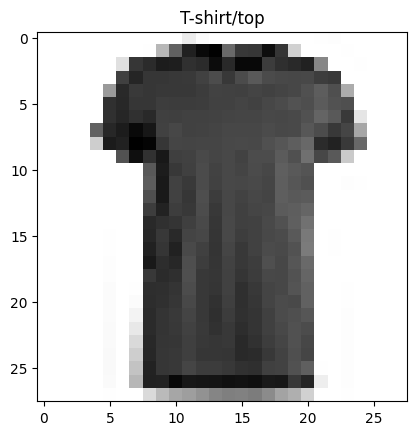

In [29]:
# Plot an example image and its label
index_of_choice = 17
plt.imshow(train_data[index_of_choice], cmap = plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

Text(0.5, 1.0, 'Dress')

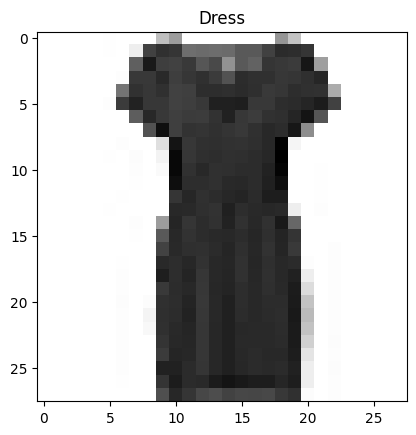

In [30]:
# Plot an example image and its label
index_of_choice = 20
plt.imshow(train_data[index_of_choice], cmap = plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

Text(0.5, 1.0, 'T-shirt/top')

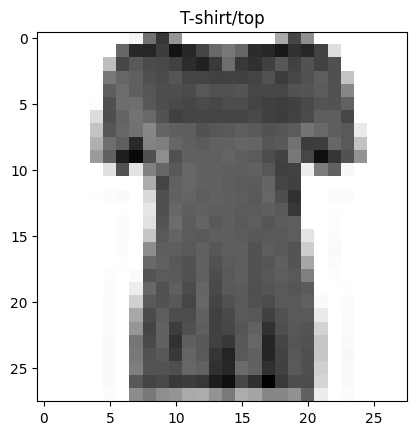

In [31]:
# Plot an example image and its label
index_of_choice = 10
plt.imshow(train_data[index_of_choice], cmap = plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

Text(0.5, 1.0, 'Bag')

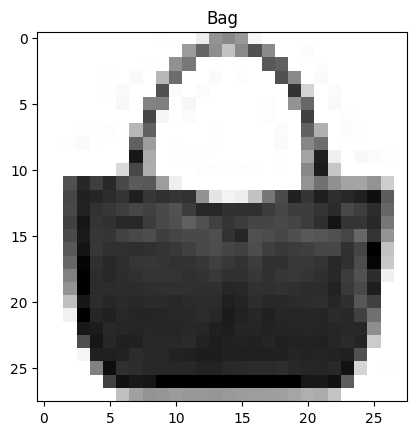

In [32]:
# Plot an example image and its label
index_of_choice = 100
plt.imshow(train_data[index_of_choice], cmap = plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

Text(0.5, 1.0, 'Coat')

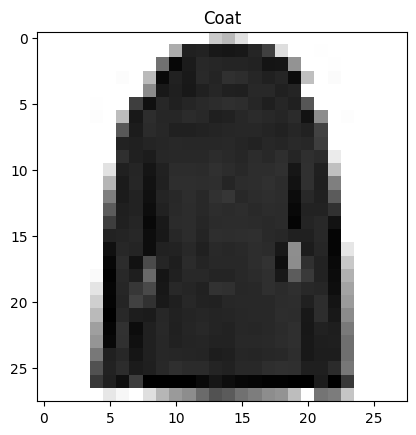

In [33]:
# Plot an example image and its label
index_of_choice = 2000
plt.imshow(train_data[index_of_choice], cmap = plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

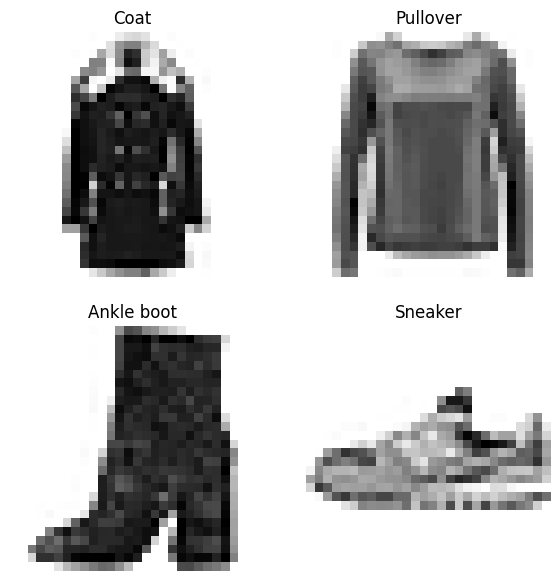

In [38]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize = (7, 7))
for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap = plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

## Building A Multi-Class Classification Model:

For our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we're going to have to tweak a few things:
* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
    * If your labels are one-hot encoded, use CategoricalCrossentropy()
    * If your labels are integer form, use SparseCategoricalCrossentropy()
* Output layer activation = Softmax (not sigmoid)

In [40]:
#When dealing with multi-dimensional feature sets (such as images), you'll have to flatten them to one dimension in a new first layer of your models
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28, 28))])
flatten_model.output_shape

c:\Users\Jake\Documents\Udemy Courses\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


(None, 784)

In [41]:
28 * 28

784

In [42]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)), #Our data needs to be flattened (from 28 x 28 to None, 784)
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# Compile the model
model_11.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])

# Fit the model
non_norm_history = model_11.fit(train_data, train_labels, epochs = 10, validation_data = (test_data, test_labels)) #You'll see why we're saving the history as non-normalized soon
#At the same time the model is fitting to training data, it can also evaluate its patterns on a validation data set

Epoch 1/10


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(32,), output.shape=(32, 10)

There are two multi-class loss functions to know about:
* CategoricalCrossentropy() requires the *labels* to be one-hot encoded
* SparseCategoricalCrossentropy() can be used when the labels are integer encoded

In [3]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# Compile the model
model_11.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])

# Fit the model
non_norm_history = model_11.fit(train_data, train_labels, epochs = 10, validation_data = (test_data, test_labels))

c:\Users\Jake\Documents\Udemy Courses\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.1810 - loss: 2.3115 - val_accuracy: 0.2457 - val_loss: 1.7620
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.2613 - loss: 1.7437 - val_accuracy: 0.3023 - val_loss: 1.6917
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.2842 - loss: 1.6662 - val_accuracy: 0.2821 - val_loss: 1.6621
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.2892 - loss: 1.6302 - val_accuracy: 0.3074 - val_loss: 1.6233
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.2960 - loss: 1.6119 - val_accuracy: 0.3369 - val_loss: 1.5658
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3329 - loss: 1.5481 - val_accuracy: 0.3578 - val_loss: 1.4943
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3492 - loss: 1.4980 - val_accuracy: 0.3659 - val_loss: 1.4770
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3549 - loss: 1.

In [44]:
# Just for fun, let's try coding the model again, but using CategoricalCrossentropy() with one-hot encoding:

# Set random seed
tf.random.set_seed(42)

# Create the model
model_11_alt = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# Compile the model
model_11_alt.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])

# Fit the model
non_norm_history_alt = model_11_alt.fit(train_data, tf.one_hot(train_labels, depth = 10), epochs = 10, validation_data = (test_data, tf.one_hot(test_labels, depth = 10)))

c:\Users\Jake\Documents\Udemy Courses\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 20ms/step - accuracy: 0.1030 - loss: 2.3050 - val_accuracy: 0.1002 - val_loss: 2.3027
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.0987 - loss: 2.3028 - val_accuracy: 0.1002 - val_loss: 2.3026
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0989 - loss: 2.3029 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0978 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.0975 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.0975 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.0975 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.0975 - loss: 2

In [45]:
# Using the original model 11...
# Check the model summary
model_11.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [46]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(np.uint8(0), np.uint8(255))

Neural networks perfer data to be scaled (or normalized); this mean they like to have the numbers in the tensors they try to find patterns in between 0 & 1. And they prefer normalization over standardization (between -1 & 1)!

In [4]:
# We can get our training and testing data between 0 and 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(np.float64(0.0), np.float64(1.0))

In [5]:
# Now our data is normalized, let's build a model to find patterns in it

# Set random seed
tf.random.set_seed(42)
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# Compile the model
model_12.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])

# Fit the model
norm_history = model_12.fit(train_data_norm,
                            train_labels,
                            epochs = 10,
                            validation_data = (test_data_norm, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.3004 - loss: 1.7843 - val_accuracy: 0.4732 - val_loss: 1.3048
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5330 - loss: 1.2141 - val_accuracy: 0.5885 - val_loss: 1.0384
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5839 - loss: 0.9978 - val_accuracy: 0.6190 - val_loss: 0.9356
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6525 - loss: 0.8978 - val_accuracy: 0.7029 - val_loss: 0.8166
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7141 - loss: 0.7880 - val_accuracy: 0.7319 - val_loss: 0.7493
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7443 - loss: 0.7214 - val_accuracy: 0.7550 - val_loss: 0.7242
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7589 - loss: 0.6912 - val_accuracy: 0.7591 - val_loss: 0.7082
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7647 - loss: 0.6740 - 

🔑 **Note:** Neural networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 & 1).

<Axes: title={'center': 'Normalized data'}>

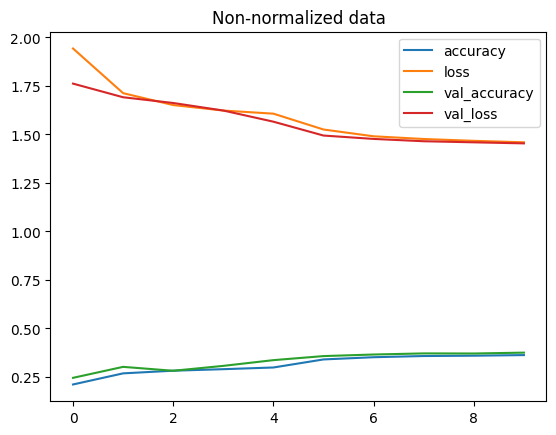

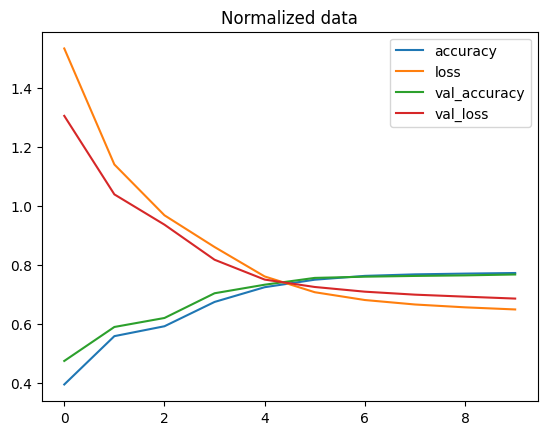

In [7]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title = ('Non-normalized data'))
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title = 'Normalized data')

🔑 **Note:** The same model with even *slightly* different data can produce *dramatically* different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture).

## Finding The Ideal Learning Rate:

In [9]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# Compile model
model_13.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch / 20))

# Fit the model
find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs = 40,
                               validation_data = (test_data_norm, test_labels),
                               callbacks = [lr_scheduler])

c:\Users\Jake\Documents\Udemy Courses\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 32ms/step - accuracy: 0.3938 - loss: 1.5085 - val_accuracy: 0.7067 - val_loss: 0.8280 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 32ms/step - accuracy: 0.7247 - loss: 0.7781 - val_accuracy: 0.7455 - val_loss: 0.7093 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7621 - loss: 0.6694 - val_accuracy: 0.7709 - val_loss: 0.6491 - learning_rate: 0.0013
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7824 - loss: 0.6169 - val_accuracy: 0.7847 - val_loss: 0.6202 - learning_rate: 0.0014
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7956 - loss: 0.5877 - val_accuracy: 0.7909 - val_loss: 0.6016 - learning_rate: 0.0016
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8021 - loss: 0.5692 - val_accuracy: 0.7970 - val_loss: 0.5861 - learning_rate: 0.0018
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.80

Text(0.5, 1.0, 'Finding the ideal learning rate')

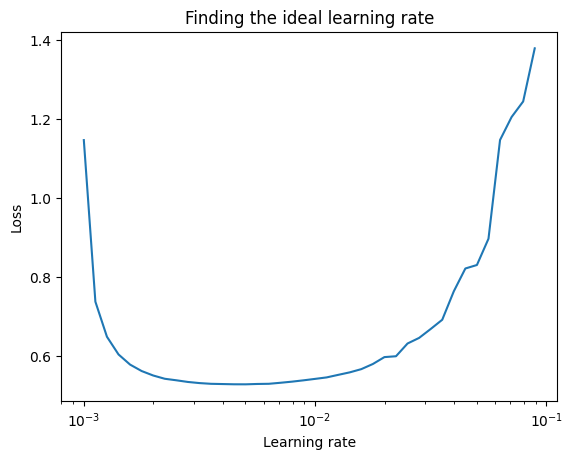

In [ ]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40) / 20))
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Finding the ideal learning rate')

#Here's proof that the default parameters are often a good starting point for tensorflow models:

In [13]:
# Let's refit a model with the ideal learning rate

# Set random seed
tf.random.set_seed(42)

# Create model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# Compile model
model_14.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                 metrics = ['accuracy'])

# Fit the model
history_14 = model_14.fit(train_data_norm,
                          train_labels,
                          epochs = 20,
                          validation_data = (test_data_norm, test_labels))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 29ms/step - accuracy: 0.3961 - loss: 1.6743 - val_accuracy: 0.7253 - val_loss: 0.7778
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7416 - loss: 0.7294 - val_accuracy: 0.7589 - val_loss: 0.6842
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7672 - loss: 0.6567 - val_accuracy: 0.7684 - val_loss: 0.6525
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7803 - loss: 0.6234 - val_accuracy: 0.7755 - val_loss: 0.6337
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7885 - loss: 0.6008 - val_accuracy: 0.7817 - val_loss: 0.6213
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7941 - loss: 0.5823 - val_accuracy: 0.7878 - val_loss: 0.6055
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7996 - loss: 0.5680 - val_accuracy: 0.7923 - val_loss: 0.5920
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8024 - loss: 0.5562 

## Evaluating Our Multi-Class Classification Model:

To evaluate our multi-class classification model, we could:
* Evaluate its performance using other classification metrics (such as a confusion matrix)
* Assess some of its predictions (through visualizations)
* Improve its results (by training it for longer or changing the architecture)
* Save and export it for use in an application

Let's go through the top 2...

In [14]:
# Create a confusion matrix

import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes = None, figsize = (10, 10), text_size = 15):
    # Create the confusion matrix
    cm = confusion_matrix(y_true, tf.round(y_pred))
    cm_norm = cm.astype('float') / cm.sum(axis = 1)[: np.newaxis] # Normalize our confusion matrix
    n_classes = cm.shape[0]

    # Let's prettify it
    fig, ax = plt.subplots(figsize = figsize)
    # Create a matrix plot
    cax = ax.matshow(cm, cmap = plt.cm.Blues)
    fig.colorbar(cax)

    # Set labels to be classes
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title = 'Confusion Matrix',
        xlabel = 'Predicted Label',
        ylabel = 'True Label',
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels)

    # Set x-axis labels to bottom
    ax.xaxis.set_label_position('bottom')
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    # Set threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f'{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)', horizontalalignment = 'center', color = 'white' if cm[i, j] > threshold else 'black', size = text_size)

In [17]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [20]:
# Make some predictions with our model
y_probs = model_14.predict(test_data_norm) # probs is short for "prediction probabilities"

# View the first 5 predictions
y_probs[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step


array([[1.37408337e-04, 6.26068795e-04, 1.74722572e-05, 8.14969462e-05,
        6.74354628e-10, 4.16936725e-02, 3.29330251e-05, 1.43016666e-01,
        1.03613682e-04, 8.14290643e-01],
       [4.94496599e-05, 1.19313294e-15, 9.61804509e-01, 2.82508217e-09,
        5.55967493e-03, 1.39461545e-08, 3.24375816e-02, 4.58908440e-33,
        1.48748426e-04, 0.00000000e+00],
       [1.15012488e-08, 9.98843908e-01, 5.33724972e-07, 7.74035216e-05,
        1.07418804e-03, 4.10176226e-10, 1.92524294e-06, 1.68700035e-23,
        1.28420663e-06, 7.08585617e-07],
       [3.36640440e-08, 9.98385072e-01, 4.24085975e-08, 1.47509039e-03,
        1.30731685e-04, 4.61176930e-11, 1.67415635e-06, 1.69651933e-27,
        3.25581695e-09, 7.41851409e-06],
       [2.51870960e-01, 4.60020055e-05, 2.20183536e-01, 3.92720848e-02,
        3.15553099e-02, 1.76303100e-03, 4.21590626e-01, 1.54872035e-11,
        3.37184221e-02, 5.77147515e-14]], dtype=float32)

In [21]:
test_labels[0], test_data_norm[0]

(np.uint8(9),
 array([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.       

🔑 **Note:** Remember to make predictions on the same kind of data your model was trained on (e.g. if your model was trained on normalized data, you'll want to make predictions on normalized data).

In [25]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])] #The class with the highest probability is the one a model predicts an instance to be

(array([1.3740834e-04, 6.2606880e-04, 1.7472257e-05, 8.1496946e-05,
        6.7435463e-10, 4.1693673e-02, 3.2933025e-05, 1.4301667e-01,
        1.0361368e-04, 8.1429064e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [26]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis = 1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
from sklearn.metrics import confusion_matrix

# Make a boring confusion matrix
confusion_matrix(y_true = test_labels, y_pred = y_preds)

array([[760,   2,  21,  93,   6,   2,  89,   1,  26,   0],
       [  1, 953,   1,  26,  10,   0,   2,   0,   7,   0],
       [ 28,   3, 663,  21, 157,   0, 105,   0,  23,   0],
       [ 46,  34,   5, 821,  28,   1,  53,   0,  11,   1],
       [  1,   7, 125,  39, 749,   0,  70,   0,   9,   0],
       [  0,   1,   0,   0,   0, 898,   0,  50,   6,  45],
       [173,   3, 154,  83, 135,   4, 414,   0,  34,   0],
       [  1,   0,   0,   0,   0,  22,   0, 940,   1,  36],
       [ 11,   3,  13,  11,   3,   7,   4,   7, 941,   0],
       [  2,   0,   0,   0,   0,   9,   0,  50,   0, 939]])

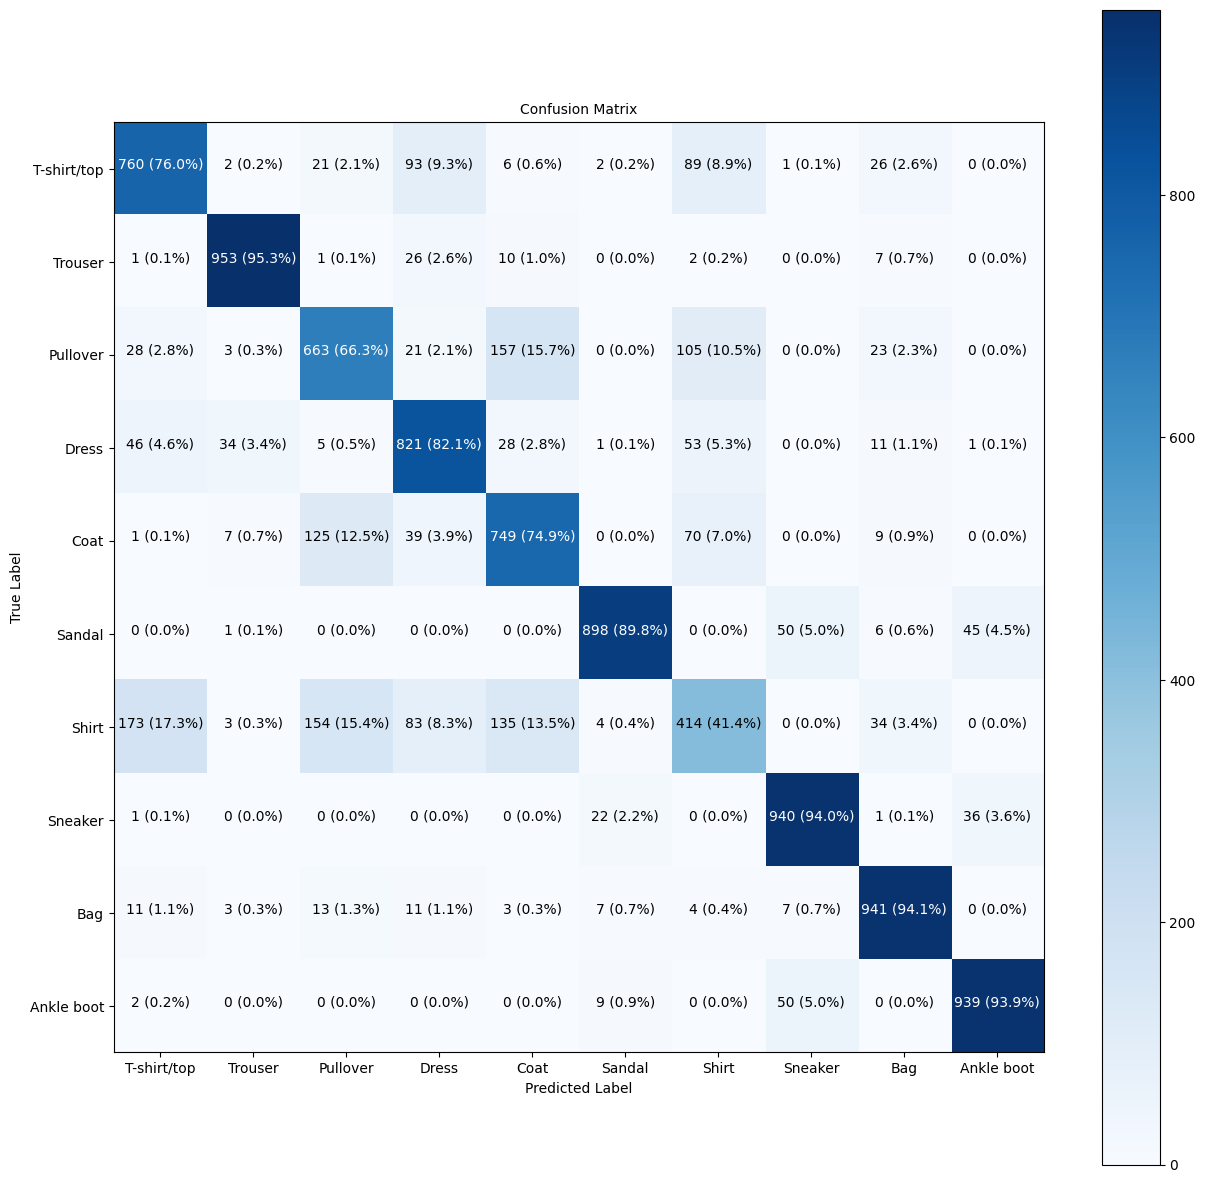

In [28]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true = test_labels,
                      y_pred = y_preds,
                      classes = class_names,
                      figsize = (15, 15),
                      text_size = 10)

🔑 **Note:** Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of your models.

How about we create a fun little function for:
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label & the predicted label

In [31]:
import random

def plot_random_image(model, images, true_labels, classes):
    """
    Picks a random image, plots it, and labels it with a prediction and truth label.
    """
    # Set up random integer
    i = random.randint(0, len(images))

    # Create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    # Plot the image
    plt.imshow(target_image, cmap = plt.cm.binary)

    # Change the color of the titles depending on if the prediction is right or wrong
    if pred_label == true_label:
        color = 'green'
    else:
        color = 'red'
    
    # Add xlabel information (prediction/true label)
    plt.xlabel('Pred: {} {:2.0f}% (True: {})'.format(pred_label, 100 * tf.reduce_max(pred_probs), true_label), color = color) # Set the color to green or red based on if prediction is right or wrong

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


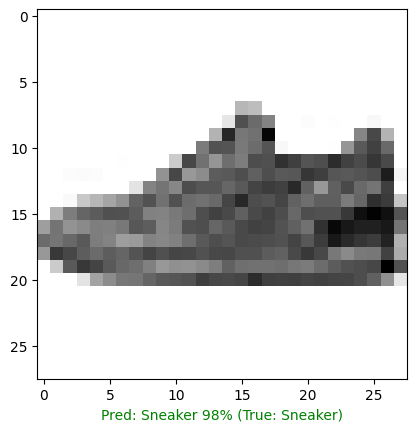

In [45]:
# Check out a random image as well as its prediction
plot_random_image(model = model_14,
                  images = test_data_norm, # Always make predictions on the same kind of data your model was trained on
                  true_labels = test_labels,
                  classes = class_names)

## What Patterns Is Our Model Learning?

In [46]:
# Find the layers of our most recent model
model_14.layers

[<Flatten name=flatten_6, built=True>,
 <Dense name=dense_18, built=True>,
 <Dense name=dense_19, built=True>,
 <Dense name=dense_20, built=True>]

In [48]:
# Extract a particular layer
model_14.layers[1]

<Dense name=dense_18, built=True>

In [ ]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape #A weights matrix has one value per data point

(array([[ 0.7759586 , -0.92599714, -0.39482015,  1.0659101 ],
        [ 0.00771427, -0.54586184,  0.15455207,  0.765299  ],
        [ 0.4723607 , -0.93689126,  0.63282526,  0.7828838 ],
        ...,
        [ 0.05868132, -0.22609973,  0.09385345, -0.06836598],
        [-0.09215686, -0.52797925,  0.08797479, -0.41627666],
        [-0.45498988, -0.9016857 ,  0.23504764,  0.9626611 ]],
       dtype=float32),
 (784, 4))

In [50]:
28 * 28

784

In [51]:
model_14.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

Now let's check out hte bias vector...

In [ ]:
# Bias and biases shapes
biases, biases.shape #A bias vextor only has one value per hidden unit

(array([1.0455477, 1.1773486, 2.281118 , 0.9412985], dtype=float32), (4,))

Every neuron has a vias vector. Each of these is paired with a weights matrix.

The bias vector gets initialized as zeros (at least in the case of a TensorFlow Dense layer).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [53]:
model_14.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

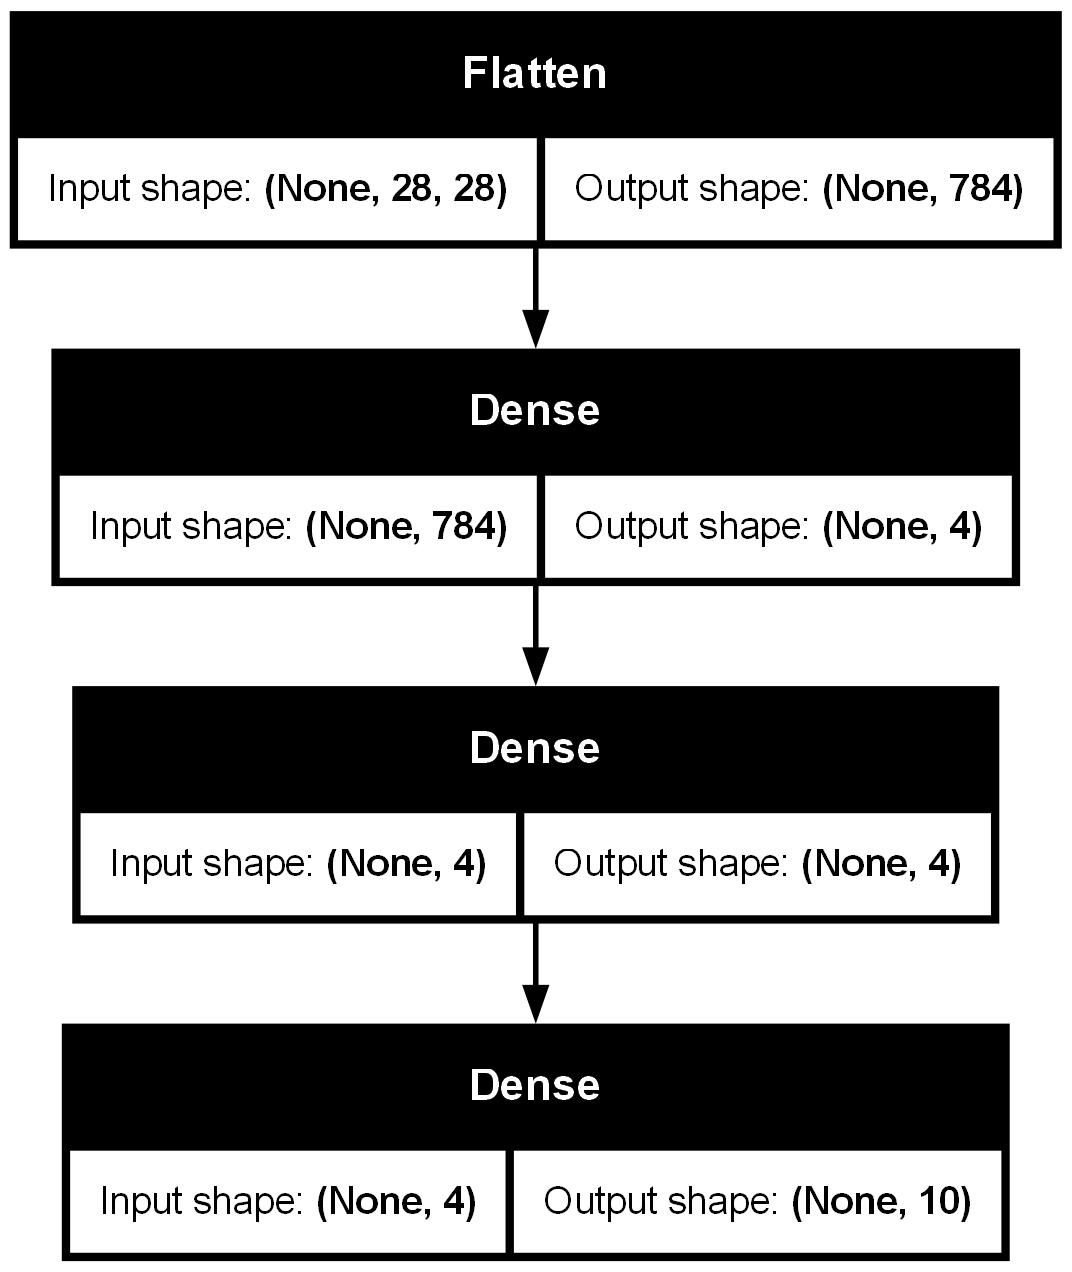

In [54]:
# Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(model_14, show_shapes = True)

# Next, check out exercises and extra curriculum...